# 확률질량함수 

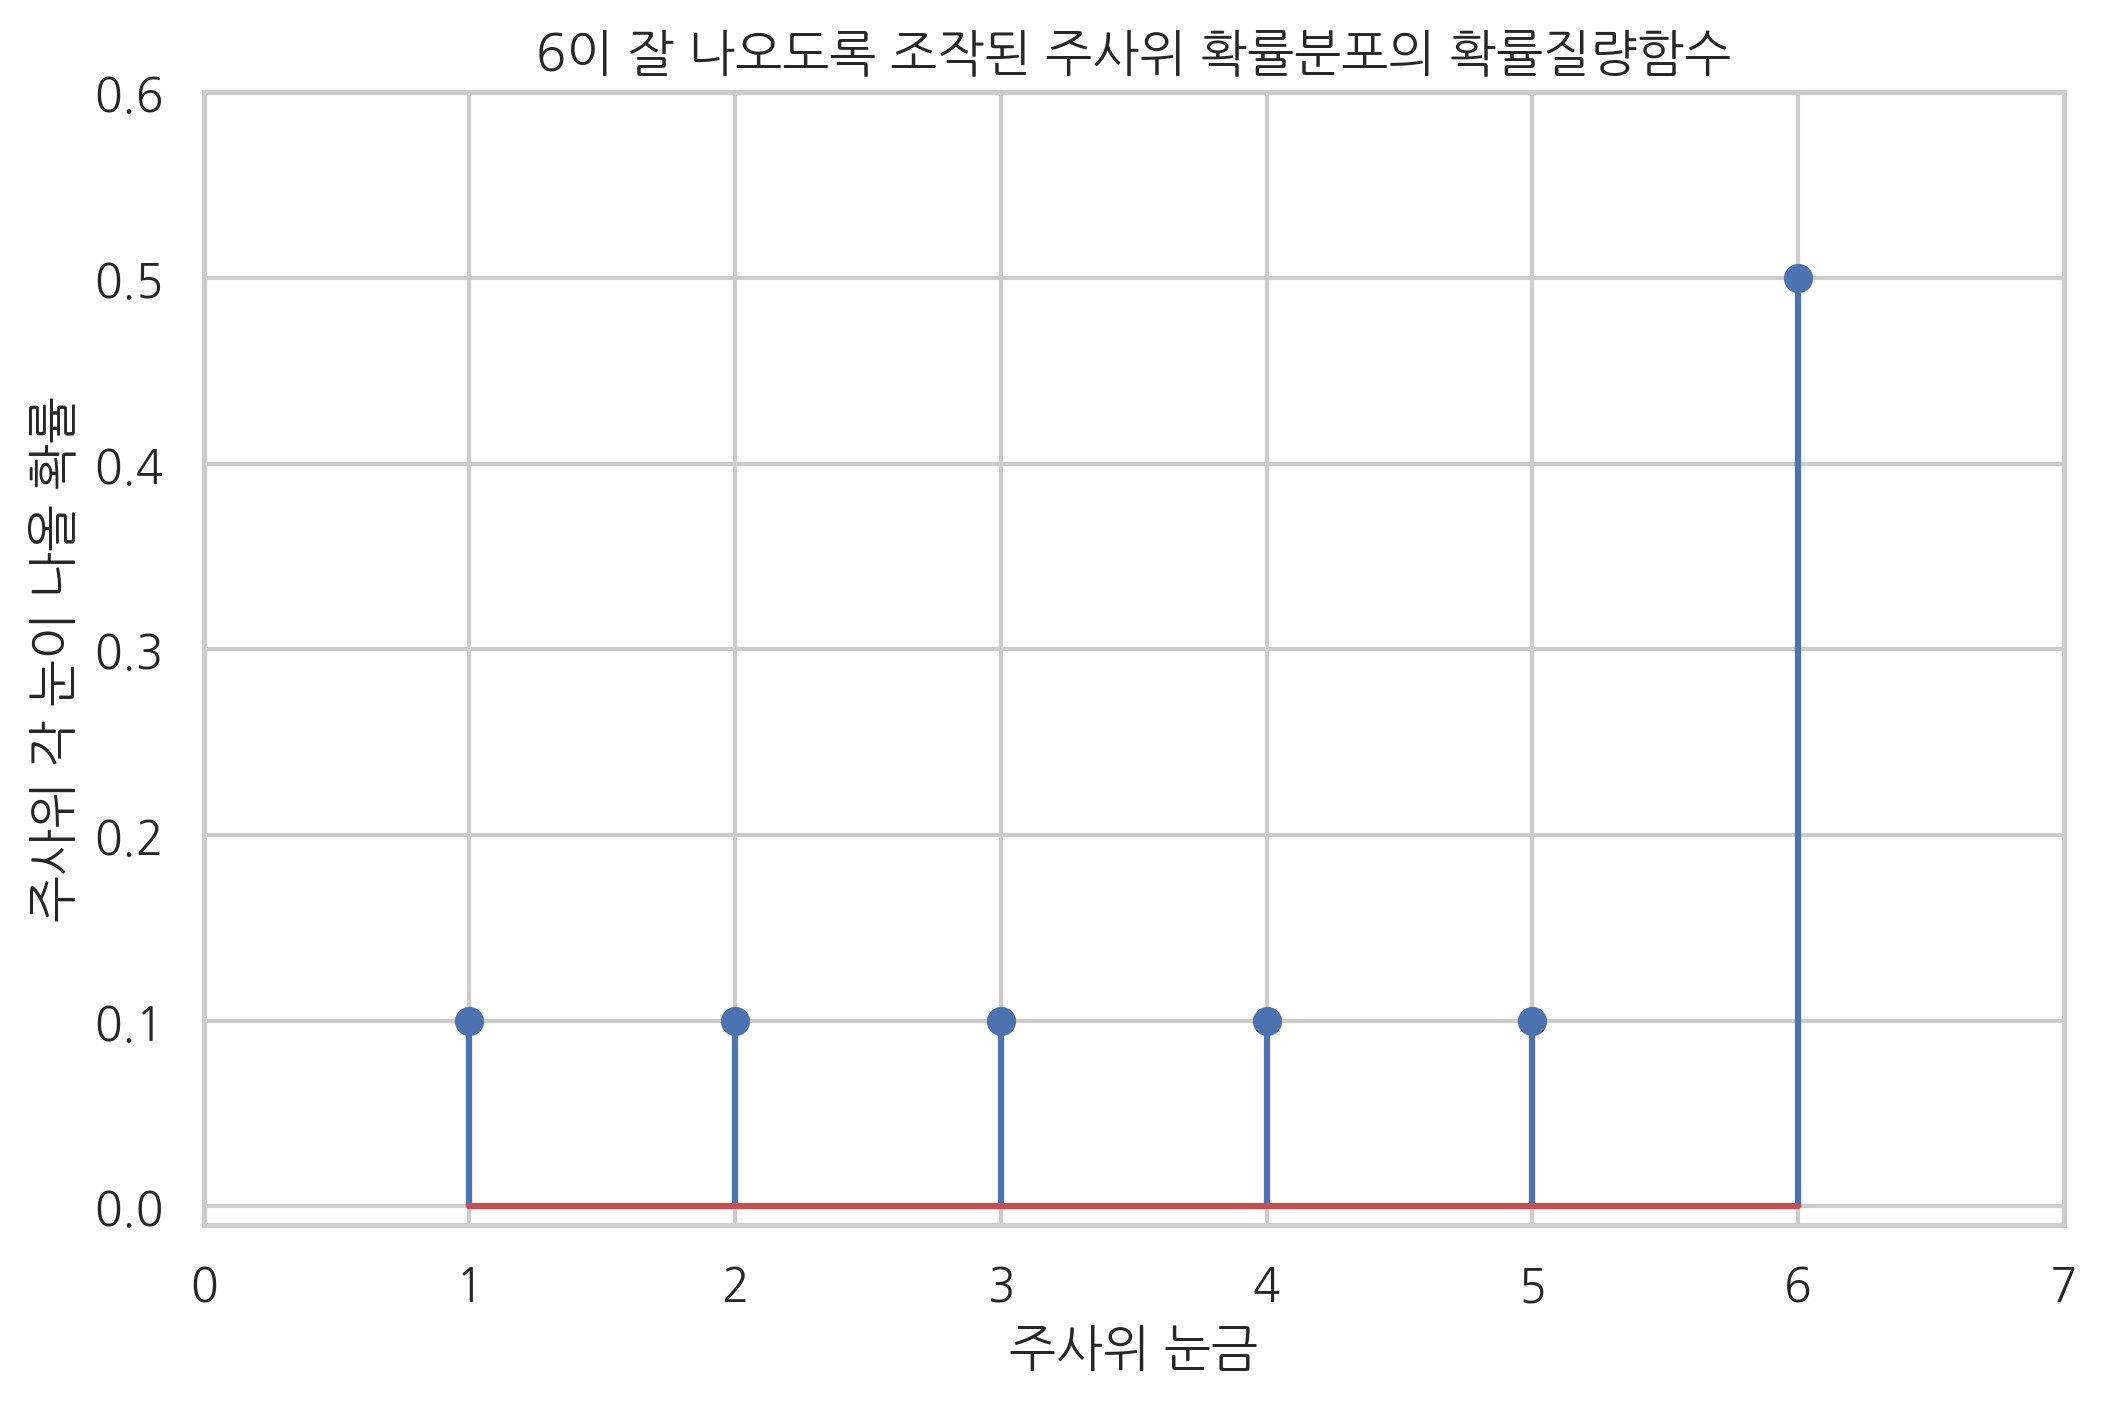

In [8]:
xx = np.arange(1,7)
yy = [0.1]*5+[0.5]

plt.stem(xx, yy)
plt.xlim(0, 7)
plt.ylim(-0.01, 0.6)
plt.xlabel('주사위 눈금')
plt.ylabel('주사위 각 눈이 나올 확률')
plt.title('6이 잘 나오도록 조작된 주사위 확률분포의 확률질량함수')
plt.show()

# 구간의 확률

In [11]:
# 연습문제 6.4.3 

ld = lambda a, b : (2/3)*((b-a)/180) if b <= 180 else (2/3)*((180-a)/180) + (1/3)*((b-180)/180) if a < 180 and 180 < b else (1/3)*((b-a)/180)
ld(0, 270)

0.8333333333333333

# 누적분포함수 

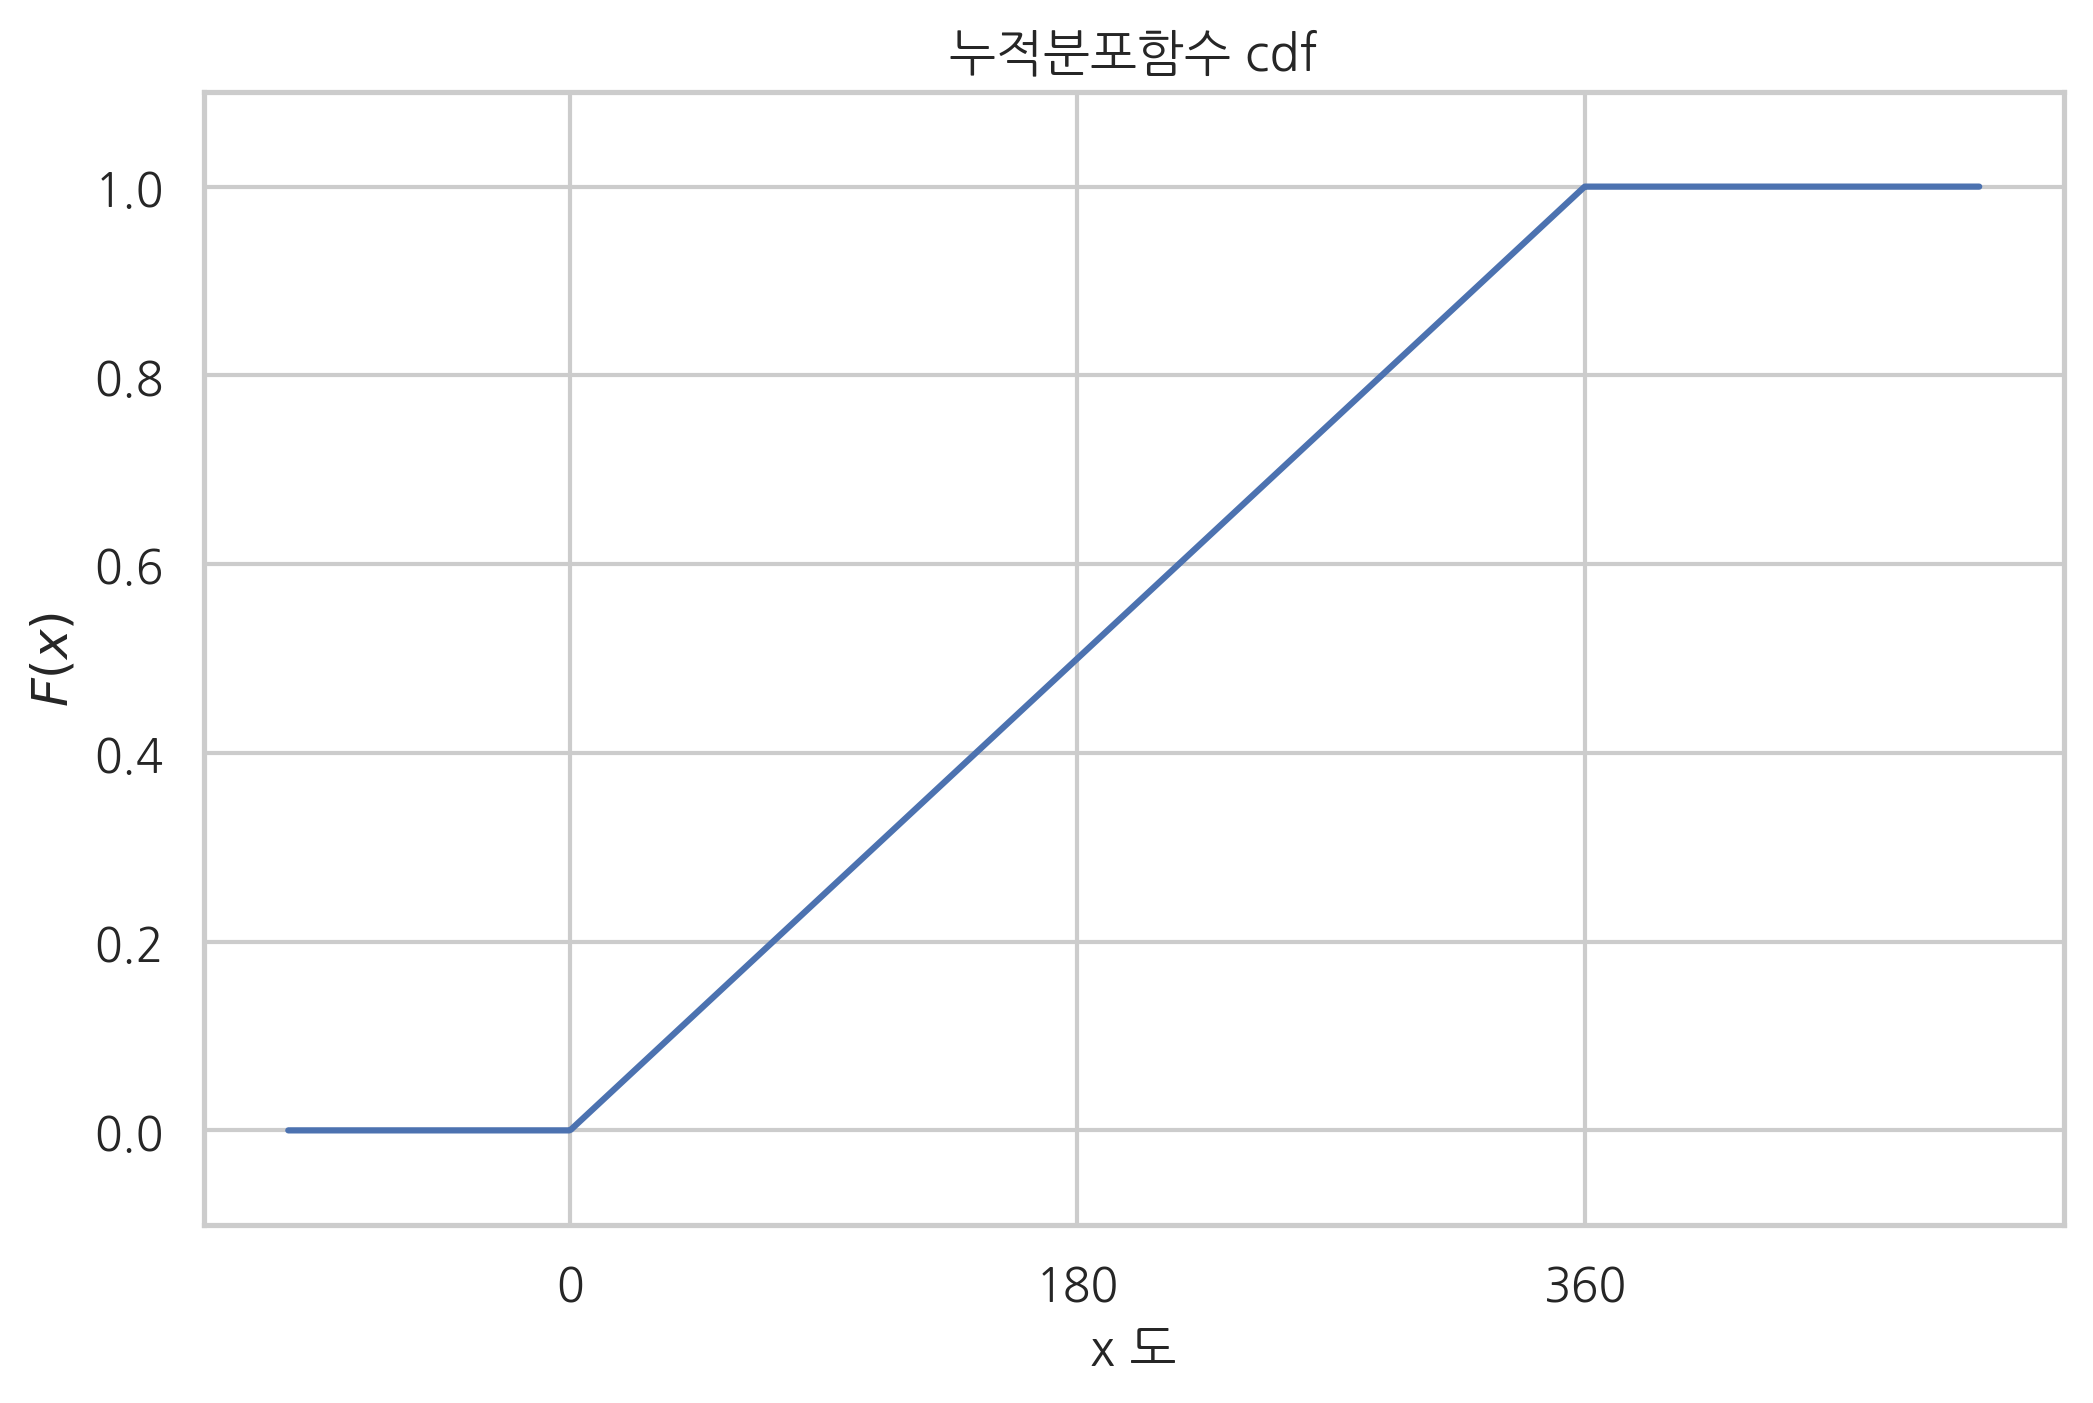

In [63]:
# 원반 문제의 누적분포함수 

xx = np.linspace(-100,500, 1000)
t = xx/360

t[xx <=0] = 0
t[xx >= 360] = 1
plt.plot(xx, t)
plt.xticks([0, 180, 360])
plt.xlabel('x 도')
plt.ylabel('$F(x)$')
plt.title('누적분포함수 cdf')
plt.ylim(-0.1, 1.1)
plt.show()

(-100.0, 500.0)

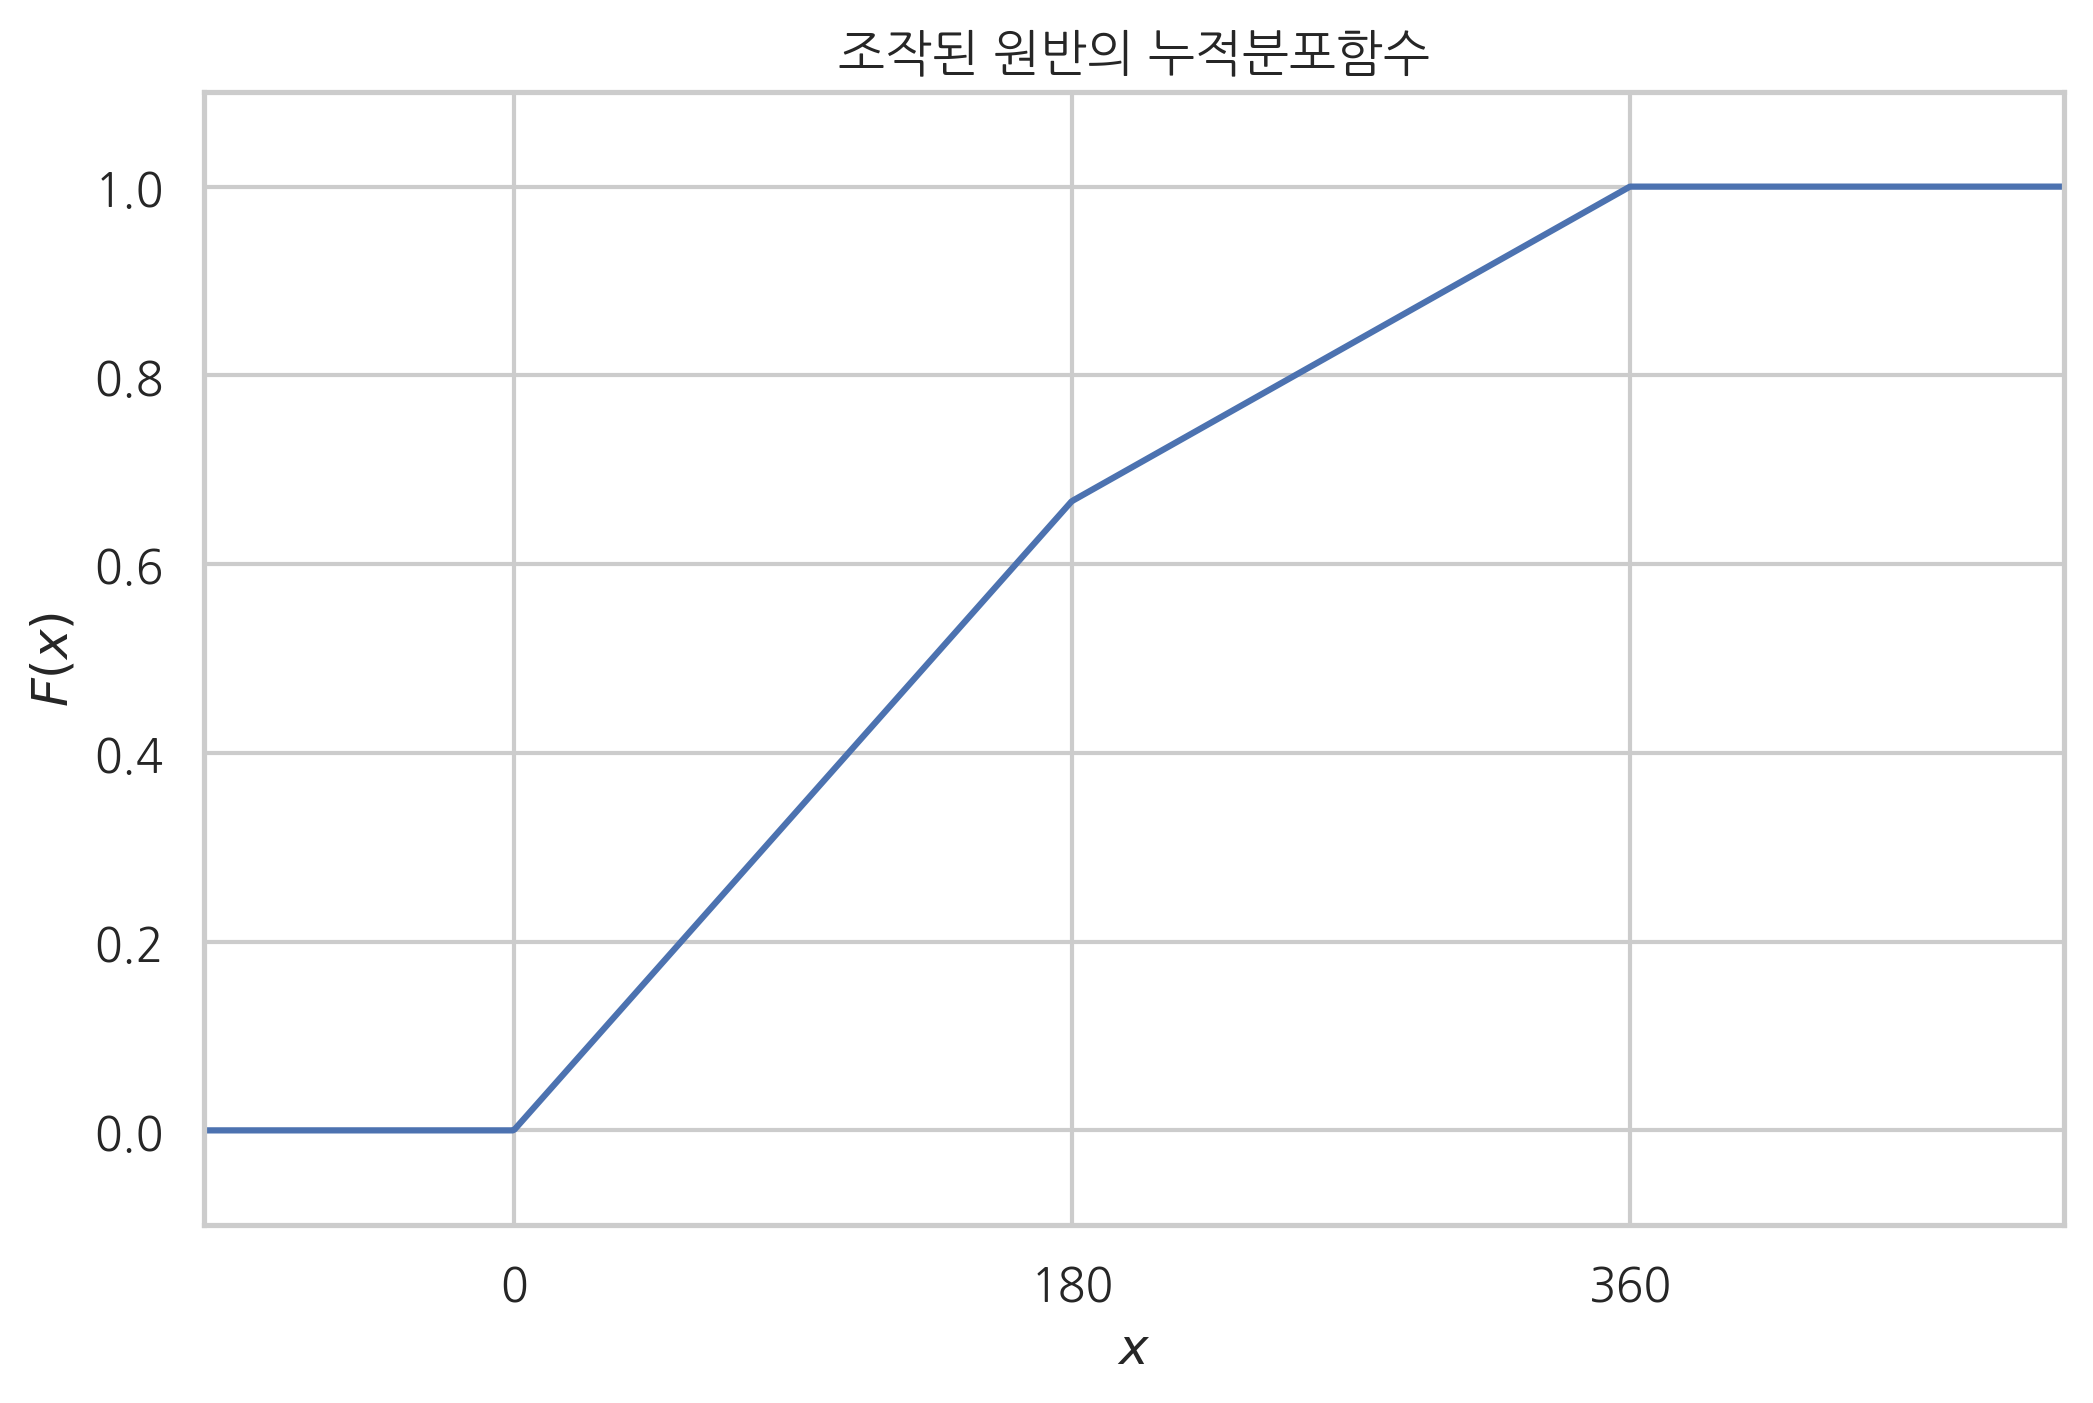

In [38]:
# 연습문제 6.4.4
xx = np.linspace(-100,500, 1000)
ld2 = lambda x : 0 if x < 0 else (2/3)*(x/180) if 0 <= x <= 180 else (2/3)+(1/3)*((x-180)/180) if 180 < x < 360 else 1
yy = [ld2(x) for x in xx]
plt.plot(xx, yy)
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.title('조작된 원반의 누적분포함수')
plt.xticks([0, 180, 360])
plt.ylim(-0.1, 1.1)
plt.xlim(-100, 500)


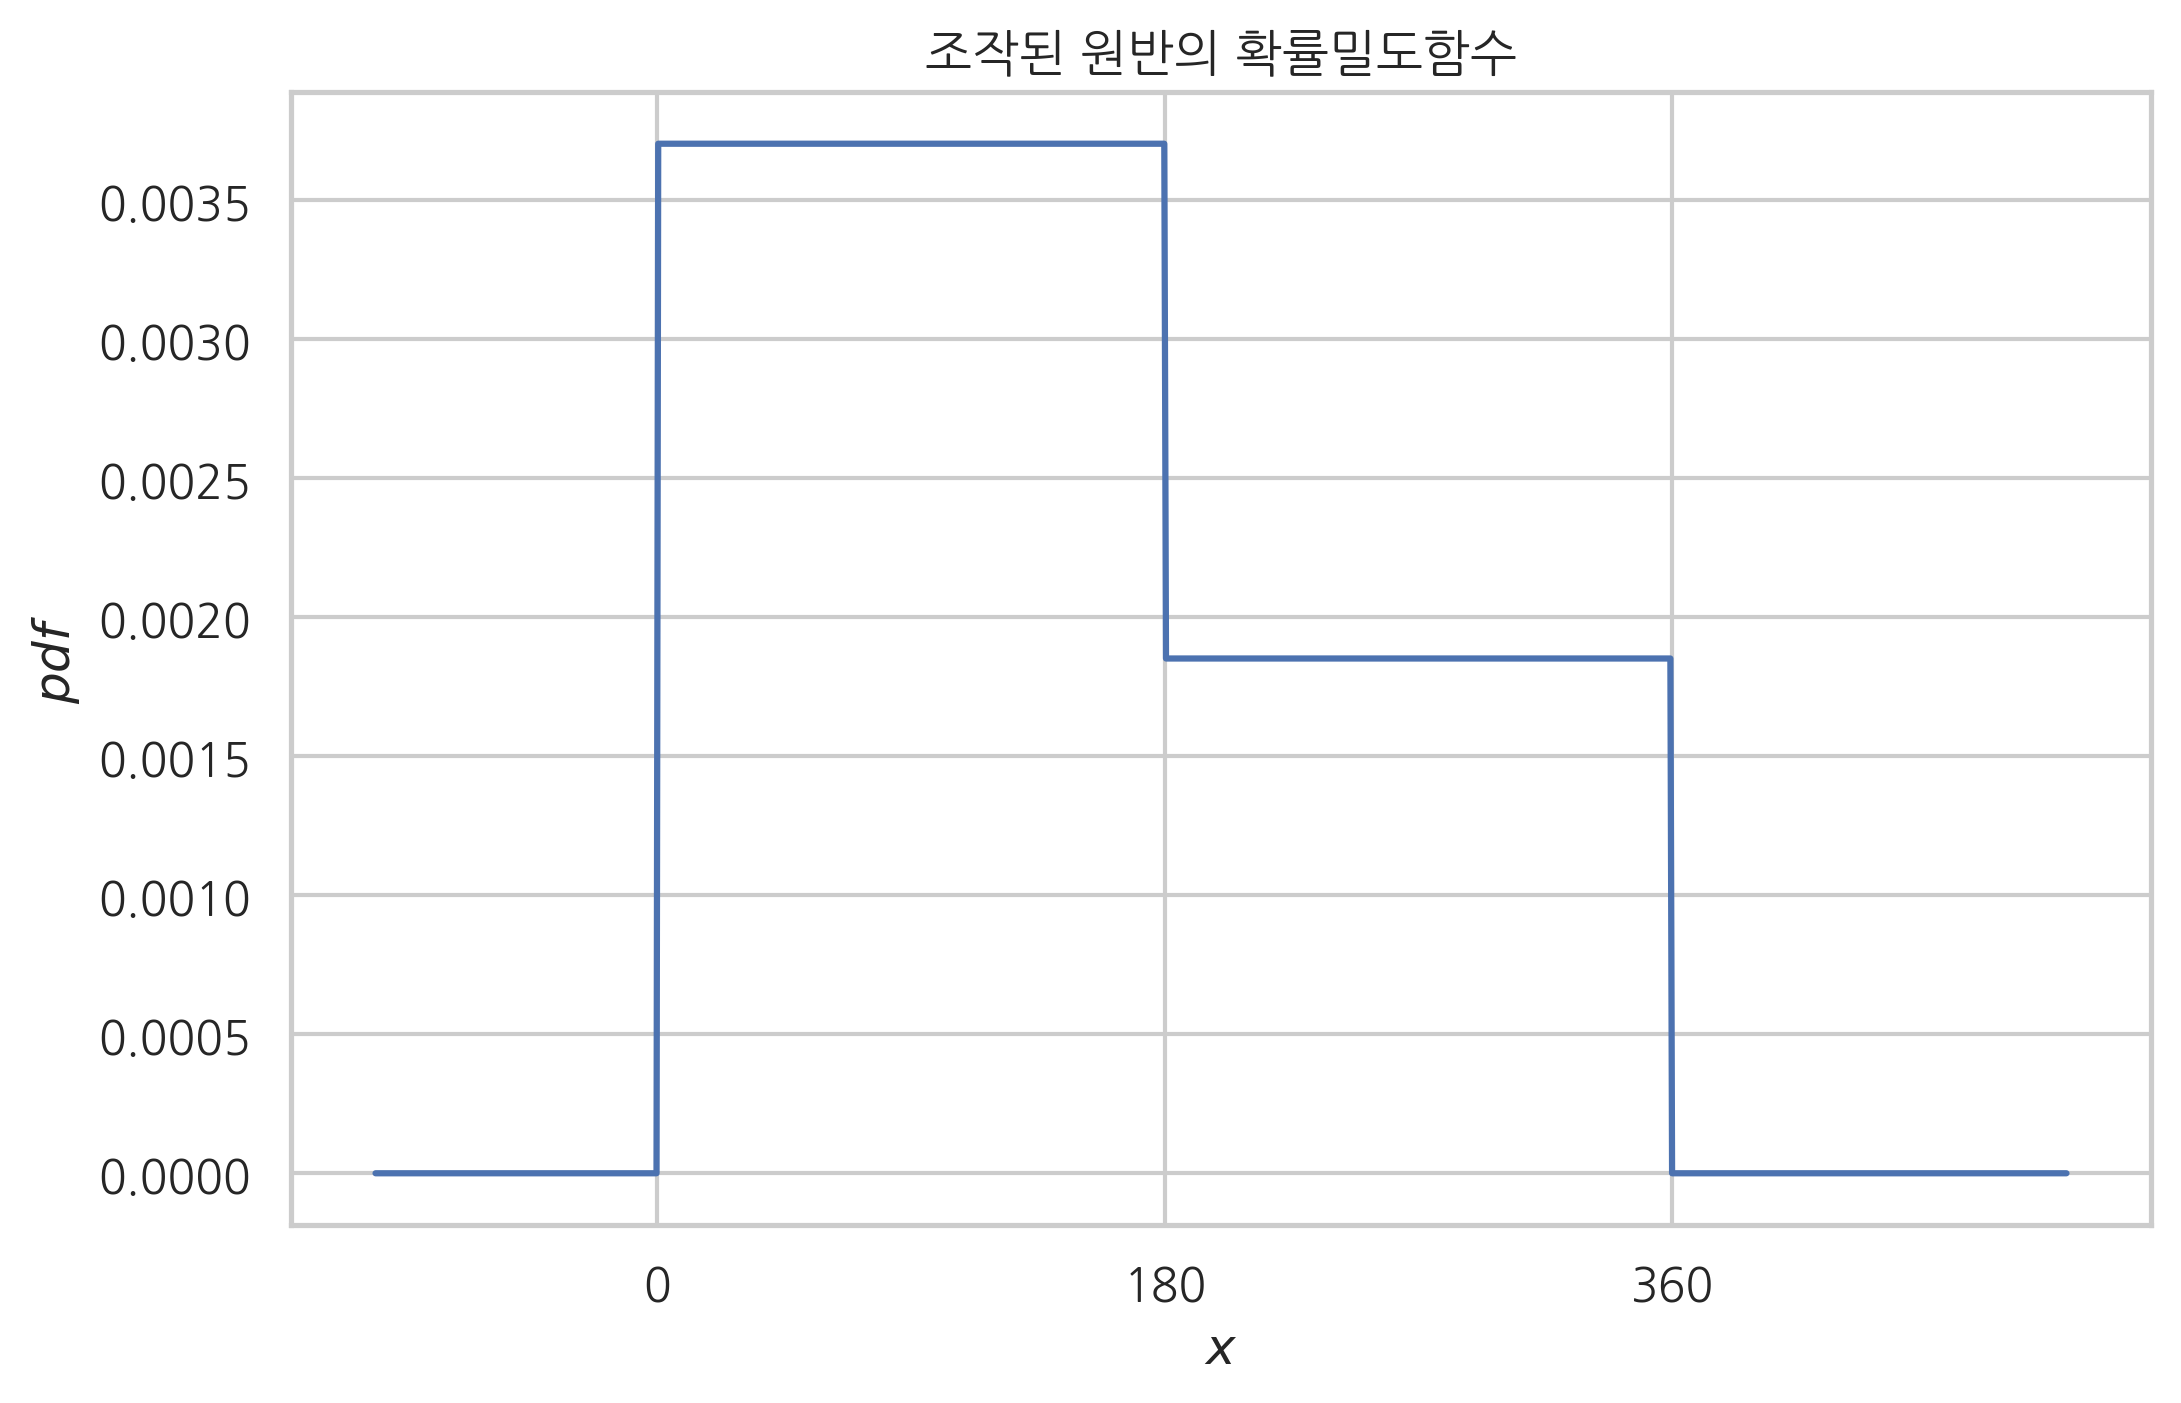

In [76]:
# 6.4.5 연습문제 
xx = np.linspace(-100,500,1000)
ld2 = lambda x : 0 if x < 0 else 1/270 if 0 <= x <= 180 else 1/540 if 180 < x < 360 else 0
yy = np.array(list(map(ld2, xx)))

plt.plot(xx, yy)
plt.xlabel('$x$')
plt.ylabel('$pdf$')
plt.title('조작된 원반의 확률밀도함수')
plt.xticks([0, 180, 360])
plt.show()

# 09.20.2021

In [82]:
# 결합확률분포 시각화 하기 
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

px = JPD(['X'], [2], np.array([12,8])/20)
print(px)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [84]:
# 6.5.8 연습문제 
py = JPD(['Y'], [2], np.array([5,5])/10)
print(py)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [85]:
pxy = JPD(['X','Y'], [2,2], np.array([3,9,7,1])/20)
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [87]:
# 6.5.7 연습문제 
pxy2 = JPD(['X','Y'], [2,2], np.array([3,3,2,2])/10)
print(pxy2)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+


In [118]:
# 6.5.8 연습문제 
print(pxy2)
ind = pxy2.check_independence(['X'],['Y'])
print(f'확률변수 X,Y 는 서로 독립인가? : {ind}') # 확률변수 X,Y는 서로 독립이다. 

print('X=0 일 때 Y의 조건부확률분포')
print(pxy2.conditional_distribution([('X',0)], inplace=False)) # X = 0 일 때 Y의 조건부확률분포
print('Y의 주변확률분포')
print(pxy2.marginal_distribution(['Y'], inplace=False))
print()

print('X=1 일 때 Y의 조건부확률분포')
print(pxy2.conditional_distribution([('X',1)], inplace=False)) # X = 1 일 때 Y의 조건부확률분포 
print()

print('Y=0 일 때 X의 조건부확률분포')
print(pxy2.conditional_distribution([('Y',0)], inplace=False))
print('X의 주변확률분포')
print(pxy2.marginal_distribution(['X'], inplace=False))
print()

print('Y=1 일 때 X의 조건부확률분포')
print(pxy2.conditional_distribution([('Y',1)], inplace=False))
print()

print('서로에 대한 조건이 전혀 영향 못 미치는 걸 보니, 확률변수 X,Y 는 서로 독립이다')

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+
확률변수 X,Y 는 서로 독립인가? : True
X=0 일 때 Y의 조건부확률분포
+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+
Y의 주변확률분포
+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+

X=1 일 때 Y의 조건부확률분포
+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+

Y=0 일 때 X의 조건부확률분포
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+
X의 주변확률분포
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X

In [135]:
py = pxy2.marginalize(['Y'], inplace=False) # X의 주변확률분포 
print(py)

px = pxy2.marginalize(['X'], inplace=False) # Y의 주변확률분포 
print(px)
print()

print('독립이라는 가정 하에 계산한 X,Y 결합확률분포')
print(py*px) # X,Y가 서로 독립이라고 가정하고, 두 확률변수의 결합확률분포를 구했다. 
print()
print('실제 결합확률분포')
print(pxy2) # 실제 결합확률분포 
print('가정 결합확률분포와 실제 결합확률분포가 같은 걸 볼 때, X,Y 는 서로 독립이다.')
ind = pxy2.check_independence(['X'],['Y'])
print(f'X,Y 확률변수는 서로 독립인가? : {ind}')

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+
+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+

독립이라는 가정 하에 계산한 X,Y 결합확률분포
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+

실제 결합확률분포
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+
가정 결합확률분포와 실제 결합확률분포가 같은 걸 볼 때, X,Y 는 서로 독립이다.
X,Y 확률변수는 서로 독립인가? : True


# 베이즈 정리 

In [158]:
from pgmpy.factors.discrete import TabularCPD

# 가능한 모든 사전확률 정의 
cpd_x = TabularCPD('X', 2, np.array([[1-0.002],[0.002]]))
print('가능한 모든 사전확률')
print(cpd_x)

가능한 모든 사전확률
+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [159]:
# 가능한 모든 가능도 정의 
cpd_y_on_x = TabularCPD('Y', 2, np.array([[0.95,1-0.99],[1-0.95, 0.99]]), evidence=['X'], evidence_card=[2])
print('가능한 모든 가능도 정의')
print(cpd_y_on_x)

가능한 모든 가능도 정의
+------+----------------------+----------------------+
| X    | X(0)                 | X(1)                 |
+------+----------------------+----------------------+
| Y(0) | 0.95                 | 0.010000000000000009 |
+------+----------------------+----------------------+
| Y(1) | 0.050000000000000044 | 0.99                 |
+------+----------------------+----------------------+


In [162]:
# 베이지안 모형 정의 
from pgmpy.models import BayesianModel

model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_x, cpd_y_on_x) # 가능한 모든 사전확률, 가능도 입력 
model.check_model()

True

In [178]:
# 베이지안 모형으로 사후확률 계산
from pgmpy.inference import VariableElimination

infer = VariableElimination(model) # 추정 객체 
post = inference.query(['X'], evidence={'Y': 1})
print(post)

0it [00:00, ?it/s]

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+


In [179]:
post = inference.query(['X'], evidence={'Y': 0})
print(post)


0it [00:00, ?it/s]

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   1.0000 |
+------+----------+
| X(1) |   0.0000 |
+------+----------+


In [194]:
from pgmpy.factors.discrete import TabularCPD

# 사전확률
pre = TabularCPD('C', 3, np.array([[1/3], [1/3], [1/3]]))
print('사전확률')
print(pre)

사전확률
+------+----------+
| C(0) | 0.333333 |
+------+----------+
| C(1) | 0.333333 |
+------+----------+
| C(2) | 0.333333 |
+------+----------+


In [264]:
from pgmpy.factors.discrete import TabularCPD

# 사전확률
pre = TabularCPD('C', 3, np.array([[1/3],[1/3],[1/3]]))
print('사전확률')
print(pre)
print()

# 가능한 모든 가능도 
values = np.array([
    [0,0,0],
    [0,1/6, 1/3],
    [0,1/3, 1/6],
    [1/6, 0, 1/3],
    [0,0,0],
    [1/3, 0, 1/6],
    [1/6, 1/3, 0],
    [1/3, 1/6, 0],
    [0,0,0]
])
likelihood = TabularCPD('G', 9, values, evidence=['C'], evidence_card=[3])
print('가능도')
print(likelihood)
print()

from pgmpy.models import BayesianModel

model = BayesianModel([('C','G')]) # 확률변수 이름 순서도 중요하다. 
model.add_cpds(pre, likelihood)
model.check_model()

from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
post = infer.query(['C'], evidence={'G': 5})

0it [00:00, ?it/s]

사전확률
+------+----------+
| C(0) | 0.333333 |
+------+----------+
| C(1) | 0.333333 |
+------+----------+
| C(2) | 0.333333 |
+------+----------+

가능도
+------+---------------------+---------------------+---------------------+
| C    | C(0)                | C(1)                | C(2)                |
+------+---------------------+---------------------+---------------------+
| G(0) | 0.0                 | 0.0                 | 0.0                 |
+------+---------------------+---------------------+---------------------+
| G(1) | 0.0                 | 0.16666666666666666 | 0.3333333333333333  |
+------+---------------------+---------------------+---------------------+
| G(2) | 0.0                 | 0.3333333333333333  | 0.16666666666666666 |
+------+---------------------+---------------------+---------------------+
| G(3) | 0.16666666666666666 | 0.0                 | 0.3333333333333333  |
+------+---------------------+---------------------+---------------------+
| G(4) | 0.0             

In [261]:
print(post)

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6667 |
+------+----------+
| C(1) |   0.0000 |
+------+----------+
| C(2) |   0.3333 |
+------+----------+
